## Natural Language Processing

First, think about C3PO, Luke Skywalker's robot sidekick in Star Wars. C3P0 is a fantasized version of human-computer interaction in the distant future. However, humans interacting with machines is an every day reality for us. Your home or car smart assistant (Alexa), customer service on websites or phone lines, autocorrect features, etc. are all examples of Natural Language Processing.

Natural Language Processing (NLP) is the field of deriving meaningful information from human speech. NLP is a branch of computer science, or more specifically a branch of artificial intelligence, concerned with allowing computers the ability to understand human speech either in a written or spoken format. 






### There are many types of NLP
There are many different varieties of natural language processing. These are just a few real world examples of these techniques to give an idea of how this is used today.

#### Sentiment Analysis
This is most of what we will be doing today. Sentiment analysis examines text in order to identify the general "feeling" of the text. Take this example...
Businesses are using sentiment analysis today to monitor and evaluate customer service. Does this customer seem satisfied?

![airbnb tweet](./images/airbnb.png)

This person is not happy. By analyzing sentiment analysis on customer support chats, tweets, etc. a company can get insights on where their service model is not working. 
    
#### Topic Modeling
Topic modeling is an unsupervised machine learning technique that is capable of scanning a set of documents, detecting patterns within them, and automatically clustering word groups or similar expressions that characterize the documents.  An example...
Imagine that you work at a legal firm and someone at a company has embezzled money. You need to figure out who that person is and you are monitoring company emails from the last six months. There are probably thousands of emails and you don't want to waste time reading all of them. In this case, you can have a computer read the text of the emails and identify the ones that are relevant to the topic of money, narrowing down the amount of emails needed to read
    
![email examples](./images/topicmodeling.png)
    
#### Text Generation
Text generation is simply the task of producing new text. A very common example of this is autocomplete or autofill features, such as when texting or in a search engine. Take the following example, we all use this every day right?

![google autofill](./images/google.png)

The code simple predicts what you might type next...

## Example 1: VADER sentiment scoring

VADER - Valence Aware Dictionary for sEntiment Reasoning. VADER is a model used for text sentiment analysis that is sensitive to both polarity (positive/negative) and intensity of emotion. This model does not account for relationships between words. This is the "bag of word" approach. All words in the text are thrown into a bag and scored. The cumulative score determines the final rating. More on this later.

## Data Gathering

The first part of most projects like this is getting data. This could be another workshop in itself so for the sake of our meeting today we will be using some sample data that I provide about product reviews on Amazon. 

There are many potential sources of data. It may be available via an API. You might have to grab it using a web scraper. You may be lucky and someone has already gathered it for you. You can process basically any textual data from many file formats.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk     #natural language toolkit

### Import Sample Data from NLTK

For starters, we will use some sample data that I am providing to you. This is data from Amazon.com for product reviews.

There are more than 500,000 rows of data in this dataset so it is big! There are 10 columns for each review but today we will be concerned really only with the "Score", "Summary", and "Text" columns.

In [70]:
data = pd.read_csv('/Users/ep9k/Desktop/sentiment_analysis/Reviews.csv')

In [71]:
print(data)

            Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        HelpfulnessNumerator  HelpfulnessDenominato

Let's see the text of just the first row of the dataset

In [72]:
# show the text of just the first review
print(data['Text'][0])


I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


Here you can see the size and shape of the test data. There are over 500,000 reviews in this dataset so let's make it smaller, just for our the purposes of our workshop today.

In [76]:
data.shape


(568454, 10)

In [77]:
# I am simplifying the dataset to just the first 500 reviews
data = data.head(500)

# Exploratory Data Analysis (EDA)
Let's play with the data to see what is in it. There are a lot of reasons for doing this, but basically EDA's main purpose is to explore the data and understand it more before making assumptions about it. This might also help you identify outliers, and find interesting relationships between the variables.

Products have a score of 1-5. This is basically a star rating. Let's see how many times each score occurs

In [78]:
data['Score'].value_counts()

5    339
4     70
3     37
1     36
2     18
Name: Score, dtype: int64

Let's use Matplotlib to visualize the data in a plot

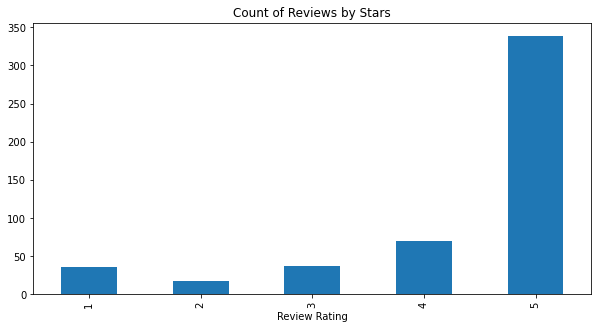

In [83]:
ax = data['Score'].value_counts().sort_index().plot(kind='bar',
                                                    title='Count of Reviews by Stars',
                                                    figsize=(10, 5))
ax.set_xlabel('Review Rating')
plt.show()

It looks like there are a lot of 5 star reviews. I assume this means the corresponding 'text' for each review will be positive. We will test this assumption later. First we need to process the text some more.

# NLTK Basics

NLTK (Natural Language Toolkit) is a python library for working with human language data. It is just one of many libraries which you can use for Natural Language Processing. A lot of the data you might be analyzing is unstructured data (aka human text). Before you can analyze data programmatically, you need to do some pre-processing. 

Let's start by processing the text of one review

In [86]:
# getting text of one review
example_text = data['Text'][50]
print(example_text)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


## Tokenization

Tokenization is the process of breaking textual data into words, terms, sentences, or some other meaninful chunk as discrete elements. After data gathering and maybe some EDA, tokenization is often the next step in the NLP workflow. The effect of this process is it breaks the text into a data structure that the computer can interpret.

NLTK allows tokenization out of the box with word_tokenize(). However, it is a little bit messy

In [85]:
tokens = nltk.word_tokenize(example_text)
print(tokens)

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft', ',', 'I', 'do', "n't", 'like', 'it', '.', 'Quaker', 'Oats', 'is', 'the', 'way', 'to', 'go', '.']


## Part of Speech
We can find the part of speech for each token. [Here](https://pythonprogramming.net/natural-language-toolkit-nltk-part-speech-tagging/) is a (complete?) list of NLTK's parts of speech. 

We don't really need the part of speech for our later exercises today but this is useful and you might want this in the future.

In [88]:
tagged = nltk.pos_tag(tokens)
tagged

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ'),
 (',', ','),
 ('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('like', 'VB'),
 ('it', 'PRP'),
 ('.', '.'),
 ('Quaker', 'NNP'),
 ('Oats', 'NNPS'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('way', 'NN'),
 ('to', 'TO'),
 ('go', 'VB'),
 ('.', '.')]

### Vader Sentiment Scoring

I introduced this model of sentiment analysis earlier but now for more details. The VADER model uses the "bag of words" approach to produce a sentiment score. This model takes all the words in your sentence/corpus and assigns a score to each word of positive, negative, neutral. Then the model takes the sum of all those scores and the result is the overall sentiment of that sentence. Stop words are removed from the scoring. Stop words are common words like "the", "and", "a/an" that don't contribute to the sentiment of a phrase or sentence. Keep in mind, this is a relatively simplistic way of performing sentiment analysis and does not take in to account the relationship between words. 

In [92]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [93]:
sia = SentimentIntensityAnalyzer()

A few quick examples of the Sentiment Intensity Analyzer in action. First, a couple of individual words followed by a sentence.

In [101]:
sia.polarity_scores("I")   # no score

{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}

In [102]:
sia.polarity_scores("am")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [103]:
sia.polarity_scores("so")

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [105]:
sia.polarity_scores("happy!")

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6114}

All together now

In [109]:
sia.polarity_scores('I am so happy!')

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

Punctuation also has an impact. The same sentence without the '!' is scored less positively

In [110]:
sia.polarity_scores("I am so happy")

{'neg': 0.0, 'neu': 0.334, 'pos': 0.666, 'compound': 0.6115}

The compound score has a range of values from -1 to +1 to rate how positive (+1) or negative (-1) a statement is. 

In [107]:
sia.polarity_scores('This is the worst!')

{'neg': 0.594, 'neu': 0.406, 'pos': 0.0, 'compound': -0.6588}

Now let's run this on our example text from earlier

In [111]:
print(example_text)
sia.polarity_scores(example_text)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

Now let's run it on our entire dataset

In [116]:
# makes a dictionary which holds the polarity score of each review

results = {}

for i, row in data.iterrows():
    text = row['Text']
    myId = row['Id']
    results[myId] = sia.polarity_scores(text)
    

In [113]:
vaders = pd.DataFrame(results).T

#this line sets the index column and calls it 'id'
vaders = vaders.reset_index().rename(columns={'index':'Id'})    

vaders


,Id,neg,neu,pos,compound
0,1,0.000,0.695,0.305,0.9441
1,2,0.138,0.862,0.000,-0.5664
2,3,0.091,0.754,0.155,0.8265
3,4,0.000,1.000,0.000,0.0000
4,5,0.000,0.552,0.448,0.9468
...,...,...,...,...,...
495,496,0.000,0.554,0.446,0.9725
496,497,0.059,0.799,0.142,0.7833
497,498,0.025,0.762,0.212,0.9848
498,499,0.041,0.904,0.055,0.1280


Now let's merge our vaders sentiment scores with our original dataframe. Now we have sentiment score and metadata added to our original data. 

In [117]:
#it is actually very easy to do
data = data.merge(vaders, how='left')

data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.091,0.754,0.155,0.8265
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.000,1.000,0.000,0.0000
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.000,0.552,0.448,0.9468


### Testing Assumptions

Let's now test some of our assumptions. I would assume that if a reviewer gave a product a 5 star review, then the text would have a positive sentiment. Accordingly, a one star review would have text with a negative sentiment. 

To start, I'll look at the sentiments of 5 star and 1 star reviews. Then we will visualize the data.

In [131]:
five_stars = data.loc[data['Score'] == 5]
# limit results to just the first 10 
five_stars = five_stars.head()

five_stars

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.000,0.695,0.305,0.9441
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.000,0.552,0.448,0.9468
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,0.034,0.693,0.273,0.9346
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,0.000,0.520,0.480,0.9487
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,0.000,0.851,0.149,0.6369


From looking at the five star results, it does indeed look like they have positive sentiment scores. In fact, most of them have a very positive sentiment score. 

In [134]:
one_stars = data.loc[data['Score'] == 1]
# limit results to just the first 10 
one_stars = one_stars.head()

one_stars

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.138,0.862,0.000,-0.5664
12,13,B0009XLVG0,A327PCT23YH90,LT,1,1,1,1339545600,My Cats Are Not Fans of the New Food,My cats have been happily eating Felidae Plati...,0.031,0.923,0.046,0.2960
26,27,B001GVISJM,A3RXAU2N8KV45G,lady21,0,1,1,1332633600,Nasty No flavor,"The candy is just red , No flavor . Just plan...",0.128,0.872,0.000,-0.2960
50,51,B001EO5QW8,A108P30XVUFKXY,Roberto A,0,7,1,1203379200,Don't like it,"This oatmeal is not good. Its mushy, soft, I d...",0.220,0.780,0.000,-0.5448
62,63,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,2,2,1,1215302400,stale product.,Arrived in 6 days and were so stale i could no...,0.000,1.000,0.000,0.0000


### Data Visualization

I have already used a basic plotting library, MatPlotLib, to do a few bar plots. Now I'll use an alternative called Seaborn. Seaborn is an extension to MatPlotLib which allows more sophisticated statistical graphics. But it also looks nice for simple plots too.

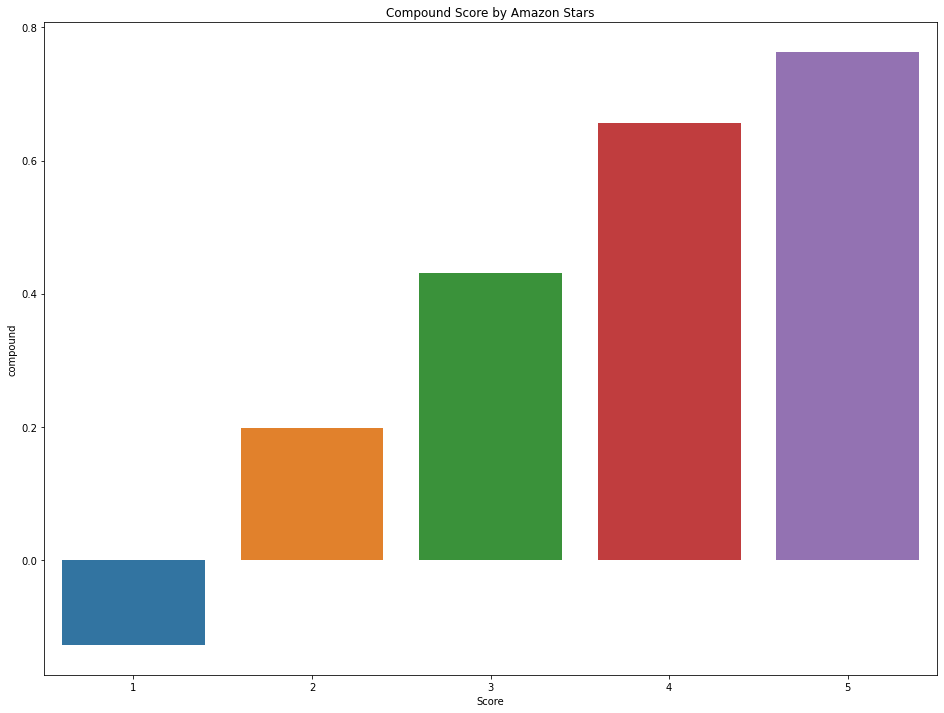

In [118]:
#overall compound score of each review
ax = sns.barplot(data=data, x='Score', y='compound', ci=None)  #ci is for the confidence interval
ax.set_title('Compound Score by Amazon Stars')
plt.show()

Here you see a positive relationship between score and positive columns. Positivity score increases as the score increases. This means that one star reviews have less positive sentiment.

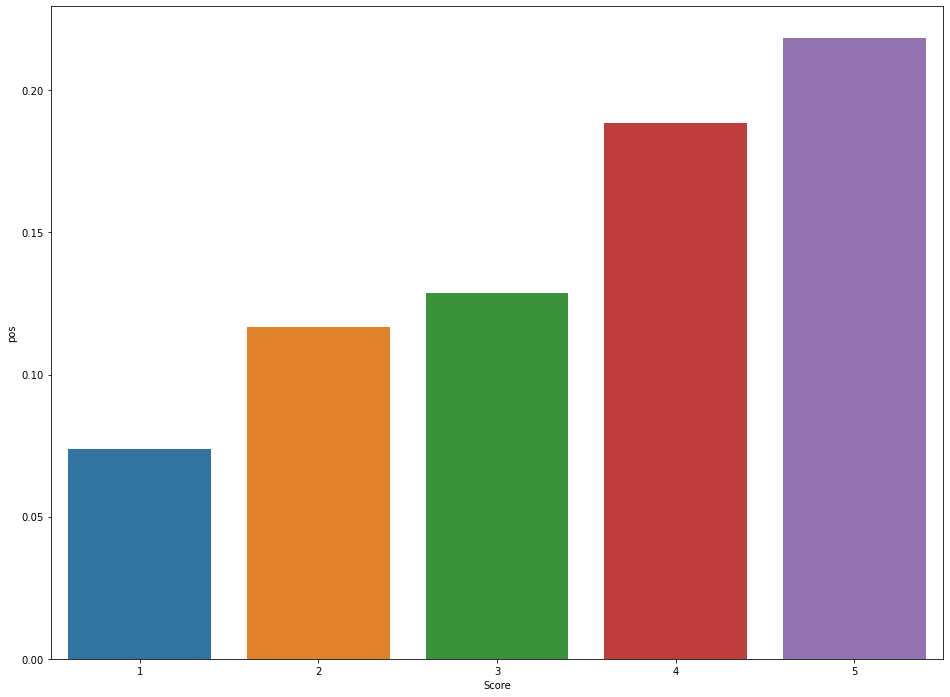

In [135]:
#positive sentiment score of each review
ax = sns.barplot(data=data, x='Score', y='pos', ci=None)

Here we have a negative relationship between score and negative columns. Negativity score decreases as score increases. This means that 5 star reviews have less negative sentiment.

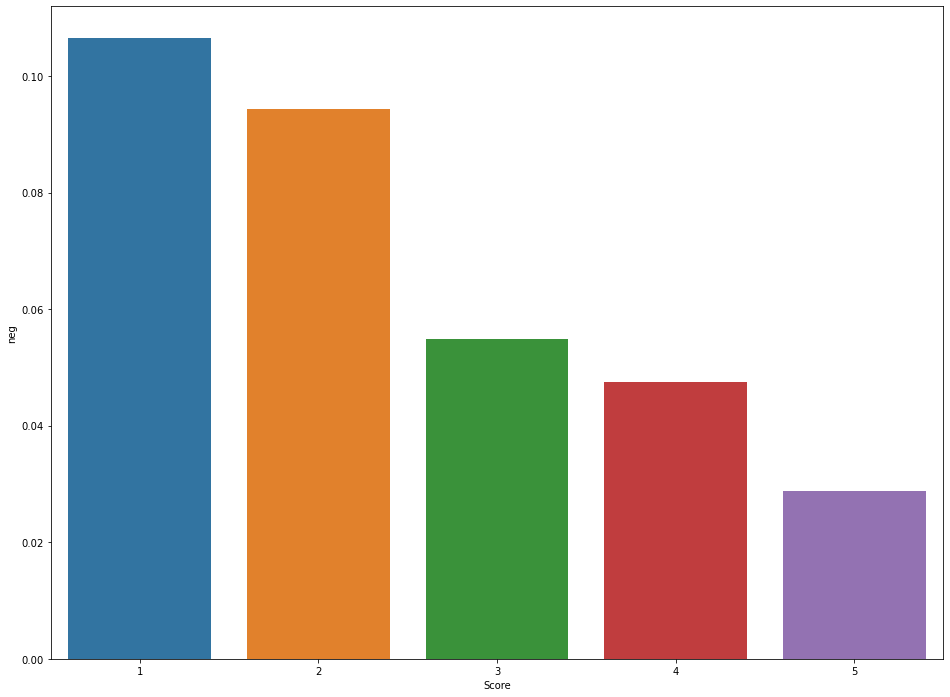

In [136]:
#negative sentiment score of each review
ax = sns.barplot(data=data, x='Score', y='neg', ci=None)

Or you could be fancy and do them all together in one plot.

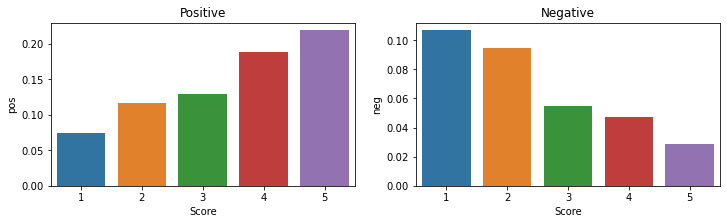

In [137]:

fig, axs = plt.subplots(1, 2, figsize=(12, 3))
sns.barplot(data=data, x='Score', y='pos', ax=axs[0], ci=None)
sns.barplot(data=data, x='Score', y='neg', ax=axs[1], ci=None)
axs[0].set_title('Positive')
axs[1].set_title('Negative')
plt.show()

## Example 2: TextBlob. A rules-based approach to scoring sentiment

TextBlob is a library built on top of nltk. It provides some additional functionality such as rules-based sentiment scores. 

In [ ]:
!conda install -c conda-forge textblob

In [138]:
from textblob import TextBlob

example1 = TextBlob("I love winter").sentiment

#again, polarity is measured between -1 and 1
#subjectivity is measured between 0 and 1. This is a measure of how opinionated something is. 
example1

Sentiment(polarity=0.5, subjectivity=0.6)

### More about this module

Linguist [Tom De Smedt](https://scholar.google.com/citations?user=8VBuRDwAAAAJ&hl=cs) has manually labeled all words in the english language ([from WordNet](https://wordnet.princeton.edu/)) their sentiment as "positive", "negative", etc. Let's take the word 'great' as an example.  

![Great lexicon](./images/great.png)

In [139]:
print(TextBlob("great").sentiment) 

Sentiment(polarity=0.8, subjectivity=0.75)


Because "great" has several meanings, how do we know which one to use and which polarity/subjectivity score to assign to this word?  TextBlob gets the results above by just averaging all the polarity and subjectivity scores of the potential uses of "great"

In [140]:
print(TextBlob("not great").sentiment) 

Sentiment(polarity=-0.4, subjectivity=0.75)


"Not great" has a polarity score of -0.4, while the subjectivity remains unchanged. In this case, when TextBlob sees 'not' in front of something, it multiplies the polarity score of that word by -0.5. 

In [141]:
print(TextBlob("very great").sentiment) 

Sentiment(polarity=1.0, subjectivity=0.9750000000000001)


If a word is preceeded by "very", both the sentiment and subjectivity scores are multiplied by 1.3, with a cap score of 1. 

In [142]:
print(TextBlob("I am great.").sentiment) 

Sentiment(polarity=0.8, subjectivity=0.75)


"I am great" has the same score as our first example, because "I" and "am" do not affect "great". 

In [143]:
print(TextBlob("I am great!").sentiment)

Sentiment(polarity=1.0, subjectivity=0.75)


Punctuation also affects the scores. Here you see an "!" increases the polarity (though I don't know by how much)"

### TextBlob Summary
TextBlob finds all of the words and phrases that it can assign a polarity and subjectivity to and averages them all together to get final scores. 

### Example with real text
For this example, we are going to use TextBlob to analyze the sentiment of the Harry Potter book series. I found the text of all 7 Harry Potter books in [this github repo](https://github.com/formcept/whiteboard/tree/master/nbviewer/notebooks/data/harrypotter). 

In [149]:
# read in text of Harry Potter: The Sorcerer's Stone
harry_potter1 = open('../SentimentAnalysis_NLP-main/transcripts/HarryPotterPhilosophersStone.txt','r').read()
harry_potter2 = open('../SentimentAnalysis_NLP-main/transcripts/HarryPotterChamberOfSecrets.txt','r').read()
harry_potter3 = open('../SentimentAnalysis_NLP-main/transcripts/HarryPotterPrisonerOfAzkaban.txt','r').read()
harry_potter4 = open('../SentimentAnalysis_NLP-main/transcripts/HarryPotterGobletOfFire.txt','r').read()
harry_potter5 = open('../SentimentAnalysis_NLP-main/transcripts/HarryPotterOrderOfThePhoenix.txt','r').read()
harry_potter6 = open('../SentimentAnalysis_NLP-main/transcripts/HarryPotterHalfBloodPrince.txt','r').read()
harry_potter7 = open('../SentimentAnalysis_NLP-main/transcripts/HarryPotterDeathlyHallows.txt','r').read()

book_texts = [harry_potter1, harry_potter2, harry_potter3, harry_potter4, harry_potter5, harry_potter6, harry_potter7]

book_names = ["Sorceror's Stone", "Chamber of Secrets", "Prisoner of Azkaban", "Goblet of Fire", "Order of the Phoenix", "Half Blood Prince", "Deathly Hallows"]

Here I am creating a dictionary of the name and text of each book, then converting that to a pandas dataframe

In [145]:
book_data = {}

for i, book in enumerate(book_names):
    book_data[book] = book_texts[i]
    
# create pandas dataframe with this data
data_df = pd.DataFrame(book_data.items(), columns=['BookName', 'BookText'])

data_df

,BookName,BookText
0,Sorceror's Stone,/ \n\n\n\n\nTHE BOY WHO LIVED \n\nMr. and Mrs....
1,Chamber of Secrets,\nJ . K . R O W L ! N G \n\nHARRY \n\nPOTTER \...
2,Prisoner of Azkaban,/ \n\n\n\n\nOWL POST \n\nHarry Potter was a hi...
3,Goblet of Fire,/ \n\n\n\n\nTHE RIDDLE HOUSE \n\nThe villagers...
4,Order of the Phoenix,HARRY \n\nPOTTER \n\n\n\n\nI \n\n\n\n\nDUDLEY ...
5,Half Blood Prince,\n* J \n\n\n\n/ \n\n\n\n\nTHE OTHER MINISTER \...
6,Deathly Hallows,I \n\n\n\n* \n\nTHE DARK LORD ASCENDING \n\nTh...


### Cleaning the data

As we did earlier, there is usually some steps of pre-processing the data before we can perform sentiment analysis on it. We are only going to do one round of data cleaning for the purposes of this workshop.

Common data cleaning steps on all text:

- Make text all lower case
- Remove punctuation
- Remove numerical values
- Remove common non-sensical text (/n)
- Tokenize text
- Remove stop words

<b> lambda functions: </b> small anonymous functions, meaning functions that are not named

In [151]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\n', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

harry_potter_df = pd.DataFrame(data_df.BookText.apply(round1))

harry_potter_df

,BookText
0,the boy who lived mr and mrs dursley of numbe...
1,j k r o w l n g harry potter the worst bir...
2,owl post harry potter was a highly unusual bo...
3,the riddle house the villagers of little hang...
4,harry potter i dudley demented the hottest day...
5,j the other minister it was nearing midnight...
6,i the dark lord ascending the two men appeare...


## Document-Term Matrix
For many Natural Language Processing techniques, the text must be tokenized, meaning broken down into smaller pieces. The most common tokenization technique is to break down text into words. We can do this using scikit-learn's CountVectorizer, where every row will represent a different document and every column will represent a different word.

In addition, with CountVectorizer, we can remove stop words. 

In [152]:
# we will create a document-term matrix using CountVectorizer and exclude common English stop words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(harry_potter_df['BookText'])
harry_potter_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
harry_potter_dtm.index = ["Sorceror's Stone", "Chamber of Secrets", "Prisoner of Azkaban", "Goblet of Fire", "Order of the Phoenix", "Half Blood Prince", "Deathly Hallows"]
harry_potter_dtm

,aaaaaaaaaaaaaarrrrrrrrrrrrggggghhhhh,aaaaaaaaaaargh,aaaaaaaaargh,aaaaaaaargh,aaaaaaaarrrrrgh,aaaaaaand,aaaaaaarrrgh,aaaaaah,aaaaaand,aaaaah,...,zis,zograf,zombie,zone,zonko,zoo,zoological,zoom,zoomed,zooming
Sorceror's Stone,0,1,0,0,0,0,0,0,0,0,...,0,0,2,0,0,7,0,1,1,2
Chamber of Secrets,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,2,0
Prisoner of Azkaban,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,11,0,0,0,9,3
Goblet of Fire,0,0,0,0,1,1,0,0,1,1,...,7,2,0,0,1,0,1,4,9,12
Order of the Phoenix,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,3,0,0,2,23,7
Half Blood Prince,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,7,2
Deathly Hallows,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,1,6,5


## Sentiment of Routine

We could look at the overall sentiment of each book (and we will), but let's do something a little more interesting. In most stories, there is an arc to the plot. Stories alternate between positive and negative events and usually end up in a positive outcome in the end. Is this true of the Harry Potter books?

Start with getting the overall positivity and polarity for each book

In [153]:
# apply a lambda function to find the polarity and subjectivity of each story
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

harry_potter_df['polarity'] = harry_potter_df['BookText'].apply(pol)
harry_potter_df['subjectivity'] = harry_potter_df['BookText'].apply(sub)

harry_potter_df

,BookText,polarity,subjectivity
0,the boy who lived mr and mrs dursley of numbe...,0.049472,0.475820
1,j k r o w l n g harry potter the worst bir...,0.044548,0.494058
2,owl post harry potter was a highly unusual bo...,0.032671,0.485666
3,the riddle house the villagers of little hang...,0.052219,0.475792
4,harry potter i dudley demented the hottest day...,0.036170,0.488392
5,j the other minister it was nearing midnight...,0.047127,0.482435
6,i the dark lord ascending the two men appeare...,0.047161,0.481454


## Sentiment of Routine over Time

Most Storylines have an arc. What is the arc of the Harry Potter books?
To get this (arbitrarily), we will split the text into 10 chunks and we will get the polarity and subjectivity score for each section.

In [154]:
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in harry_potter_df.BookText:
    split = split_text(t)
    list_pieces.append(split)
    


To demonstrate this point, first this shows there are indeed 7 books.

In [155]:
len(list_pieces)

7

And now that there are 10 chunks in each book's text

In [156]:
len(list_pieces[0])

10

Calculate the polarity score for each section of text in each book. In the end there should be 70 scores. 7 books x 10 sections per book = 70

In [162]:
# Calculate the polarity for each piece of text in each book

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.03670946026450614,
  0.008320715062012525,
  0.09166974954081406,
  0.06460785453862376,
  0.03809108297371207,
  0.06641762351813899,
  0.05199167580255241,
  0.035379484409539065,
  0.044295234291095185,
  0.05400896297372071],
 [0.0563743847038778,
  0.06885438689217759,
  0.05510049167318188,
  0.07909284354936541,
  0.036390349437559734,
  0.011205687254319462,
  0.03650850755873589,
  0.014827570772600888,
  0.018685277737244026,
  0.06477400250585737],
 [0.046497764754807026,
  0.040658972525945046,
  0.05168185124568106,
  0.05152927553597207,
  -0.007709417818113483,
  0.07915983750773957,
  0.01682790602579828,
  -0.012019821608091745,
  -0.010228779017104507,
  0.06584754250096553],
 [0.0414357063010535,
  0.05880143183478709,
  0.07027151603609376,
  0.08596776985390842,
  0.05379243851136591,
  0.06351929048311263,
  0.03287509375763757,
  0.023629932351385666,
  0.04594116073744382,
  0.04392218643205728],
 [0.027970408829170196,
  0.05976716311831441,
  0.04569484798

Show the polarity of sections in the first book

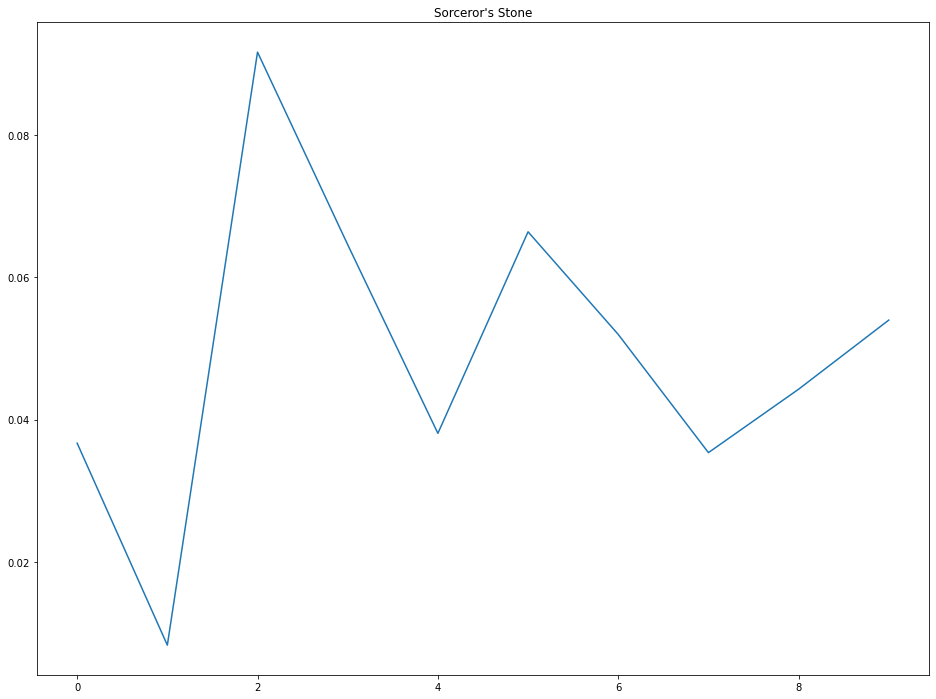

In [157]:
# Show the plot for the first book: Harry Potter and the Sorceror's Stone
harry_potter_df['BookTitle'] = ["Sorceror's Stone", "Chamber of Secrets", "Prisoner of Azkaban", "Goblet of Fire", "Order of the Phoenix", "Half Blood Prince", "Deathly Hallows"]

plt.plot(polarity_transcript[0])
plt.title(harry_potter_df['BookTitle'][0])
plt.show()

Lastly, show the polarity scores for all 7 books in one plot. This will show the 'arc' of each book. One thing that caught my eye is that the 6th book (Half Blood Prince) ends on a negative note while the 7th book (Deathly Hallows) ends on a very positi

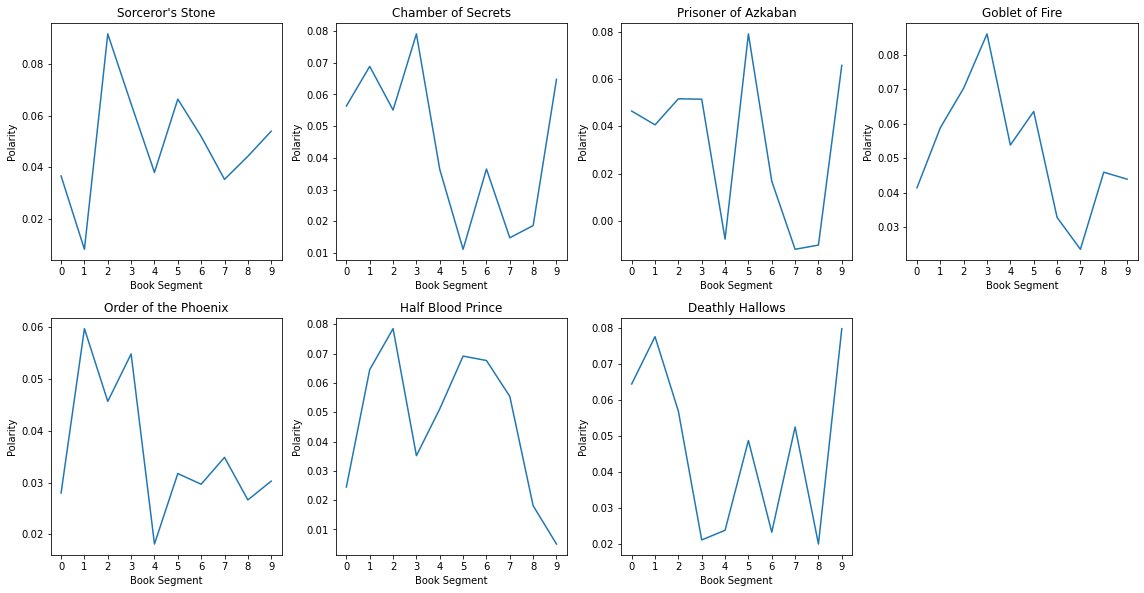

In [163]:
# Show all books in one plot

plt.rcParams['figure.figsize'] = [16, 12]

for index, book in enumerate(harry_potter_df.index):
    plt.subplot(3, 4, index+1)                             # gives each book its own plot                  
    plt.plot(polarity_transcript[index])                   # plotting polarity score of each book  
    plt.xlabel('Book Segment')                             # x axis label
    plt.ylabel('Polarity')                                 # y axis label
    plt.xticks(np.arange(0, 10, 1.0))                      # adds extra ticks on x axis
    plt.title(harry_potter_df['BookTitle'][index])         # title of each plot
    plt.tight_layout()                                     # spaces out plots
    
plt.show()